In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

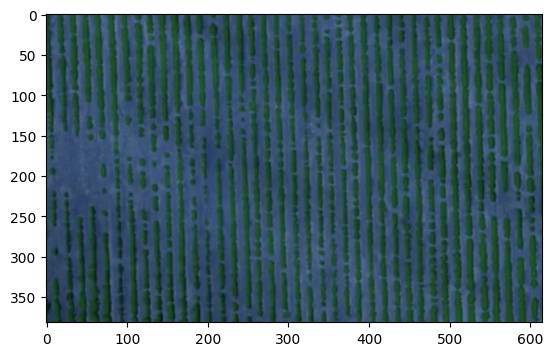

In [2]:
# image will be loaded in BGR
img = cv2.imread("crop7.jpg")

plt.imshow(img)

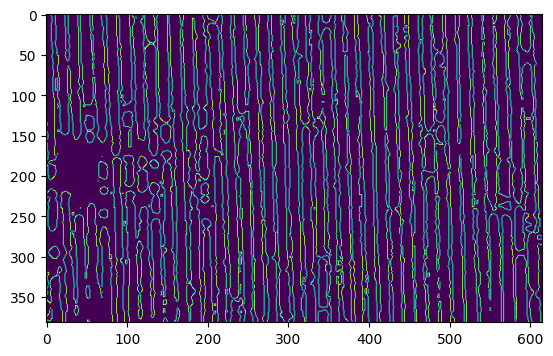

In [4]:
# separating blue, green, red channels
b,g,r = cv2.split(img)

# now minusing the red and green, as we only need green color
# you can vary multiplying integer 3 with 2, I got better results(sharp edges) when I used 3. But don't vary this too much 

gscale = 2*g-r-b

# Canny is used for edge detection, you can vary min and max arguments, and its hard to find
gscale = cv2.Canny(gscale,280,290, apertureSize = 3)

# image will be shown in gray scale
plt.imshow(gscale)

In [5]:
# getting size of grayscaled image
size = np.size(gscale)

# creating array of zeros 
skel = np.zeros(gscale.shape, np.uint8)

# setting threshold's min & max value
ret, gscale = cv2.threshold(gscale,128,255,0)


element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

done = False
while (not done):
    # erosion removes the foreground object's boundary
    eroded = cv2.erode(gscale,element)
    
    # dilation is opposite of errosion
    temp = cv2.dilate(eroded, element)
    
    # subtract just removes the first images's pixels w.r.t to scecond
    temp = cv2.subtract(gscale, temp)
    
    # bitwise turns the pixel off if its value it 0, and turn it on if its >0
    skel = cv2.bitwise_or(skel, temp)
    
    gscale = eroded.copy()
    
    zeros = size - cv2.countNonZero(gscale)
    if zeros==size:
        done = True

In [11]:
size

214920

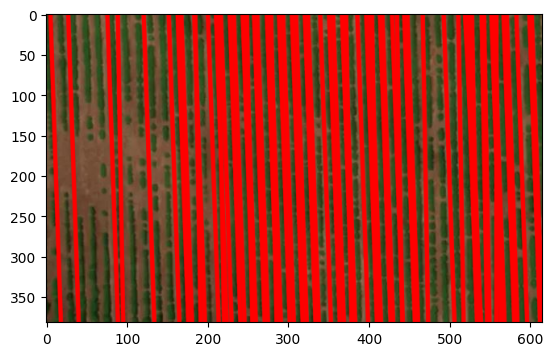

In [6]:
# Hough lines algorithm, it'll track the rows
lines = cv2.HoughLines(skel,1,np.pi/180,130)
a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
